In [11]:
import os
import re

import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import scipy as sp
import sklearn as sk
import time
from dypac import Dypac
from nilearn import image, plotting, datasets
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr

In [17]:
subjects = [108828,180129,114419,118932]
#130316,131722,151223,151526,156637,178950,201111 (have locally but not extracted)
# Define the path to 4D images
paths = []
for sub in subjects:
    paths.append('/mnt/c/Users/liz/Desktop/course-materials-2020/fMRI_HCP/HCP_RS/{}/MNINonLinear/Results/rfMRI_REST2_LR/rfMRI_REST2_LR_hp2000_clean.nii.gz'.format(sub))

In [25]:
#Take the first time point of the first subject
img = image.index_img(paths[0],0)

#plotting.plot_glass_brain(img)


'/mnt/c/Users/liz/Desktop/course-materials-2020/fMRI_HCP/HCP_RS/108828/MNINonLinear/Results/rfMRI_REST2_LR/rfMRI_REST2_LR_hp2000_clean.nii.gz'

In [22]:
print(type(img))
print(img.shape)
data = img.get_fdata()
print(type(data))
print(data.shape)

<class 'nibabel.nifti1.Nifti1Image'>
(91, 109, 91)
<class 'numpy.ndarray'>
(91, 109, 91)


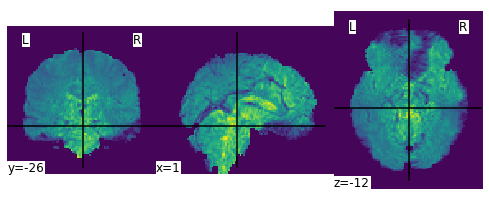

In [23]:
#from nilearn import plotting
plotting.plot_img(img)

In [31]:
#all time points of this subject
img_all = nib.load(paths[0])
type(img_all)

nibabel.nifti1.Nifti1Image

In [32]:
data = img_all.get_fdata()
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(91, 109, 91, 1200)



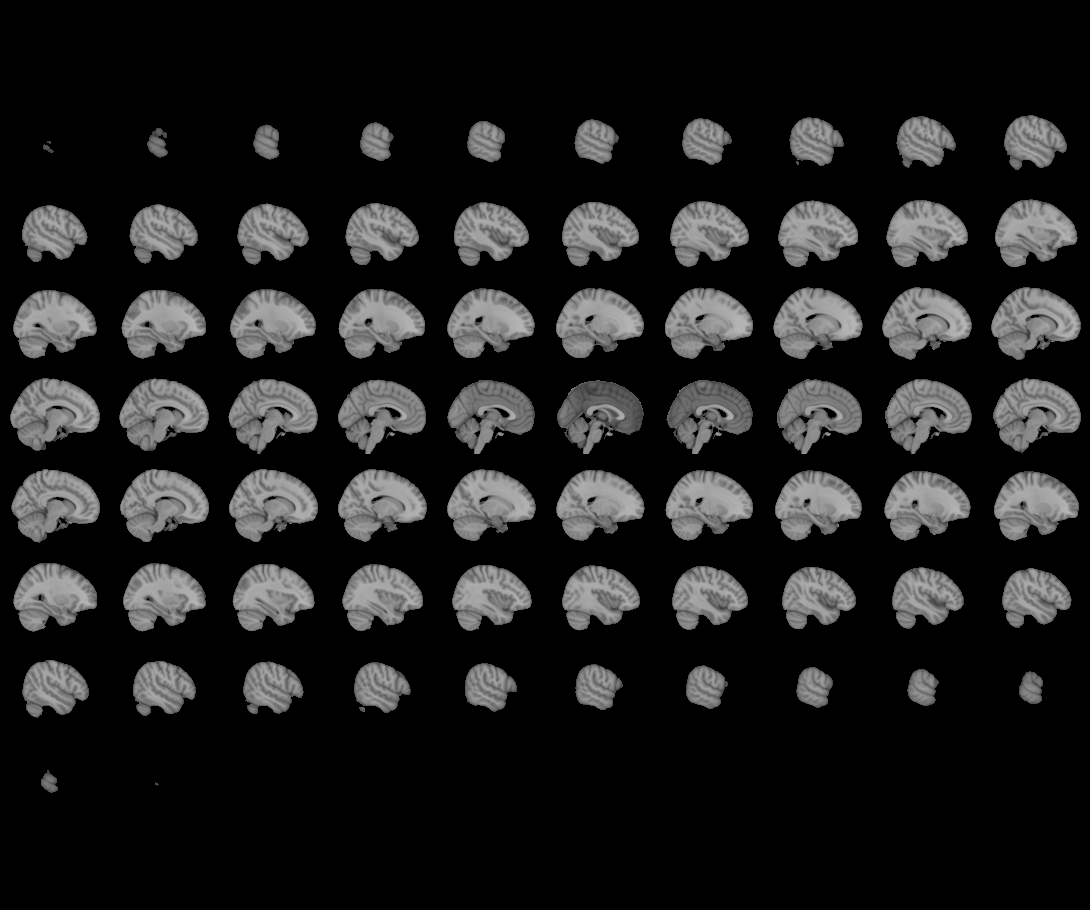
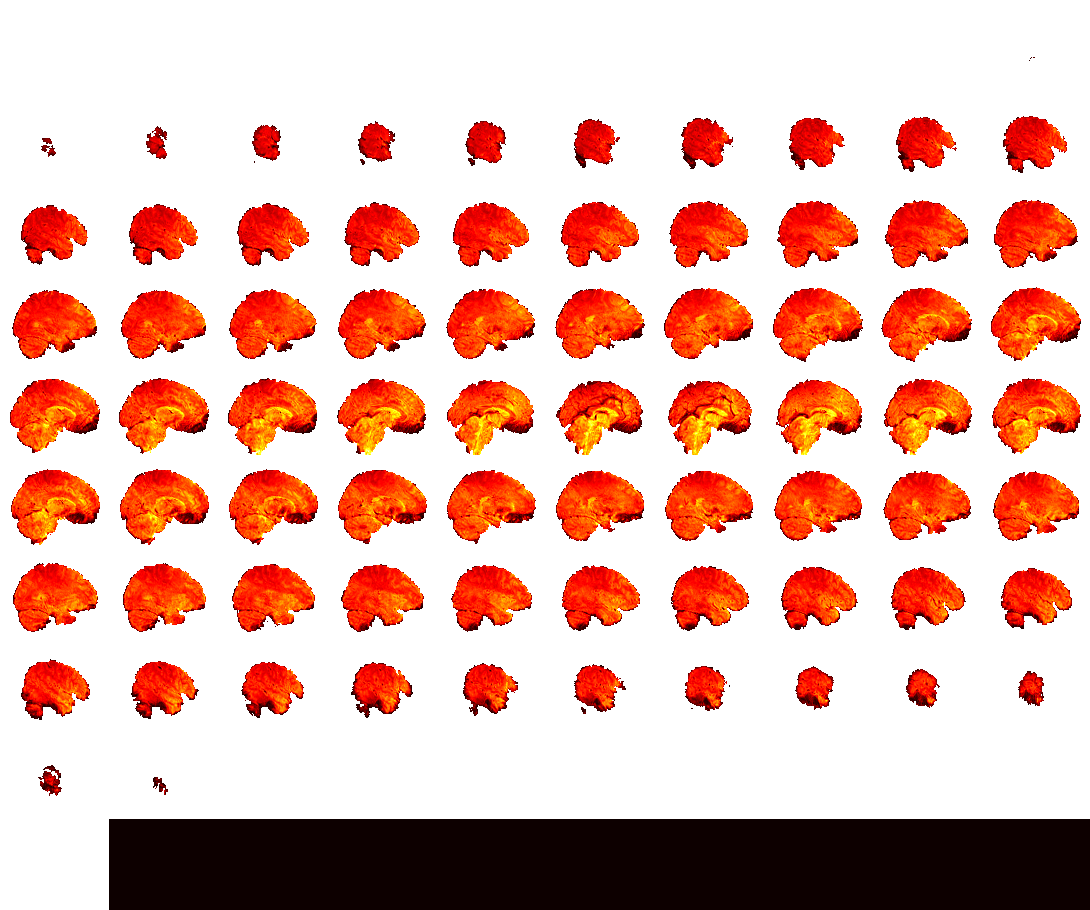

In [33]:
from nilearn.image import mean_img

plotting.view_img(mean_img(img_all))

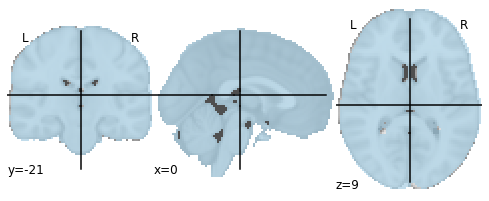

In [34]:
brain_mask = datasets.load_mni152_brain_mask()
plotting.plot_roi(brain_mask, cmap='Paired')

In [35]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=brain_mask, standardize=True)
masker

NiftiMasker(detrend=False, dtype=None, high_pass=None, low_pass=None,
            mask_args=None,
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f5b62acb550>,
            mask_strategy='background', memory=Memory(location=None),
            memory_level=1, reports=True, sample_mask=None, sessions=None,
            smoothing_fwhm=None, standardize=True, t_r=None, target_affine=None,
            target_shape=None, verbose=0)

In [36]:
# We give the masker a filename and retrieve a 2D array ready
# for machine learning with scikit-learn 
fmri_masked = masker.fit_transform(img_all)
print(fmri_masked)

[[-0.06180822 -0.06935803 -0.14755687 ...  0.13116343  0.08690275
   2.649144  ]
 [ 0.01373159  0.15244752 -0.22235653 ...  0.65586185 -1.2915316
   0.60211384]
 [-0.36963338  1.3326732   0.5634157  ...  0.2686988   0.46652758
   1.1270815 ]
 ...
 [-1.2603809   0.22582729  0.25882393 ... -1.6212481   2.1955798
   0.50735015]
 [-0.38091987 -0.9900159  -1.5151757  ... -0.473508    0.5082627
  -2.060084  ]
 [ 0.25421697  0.8448415   0.718542   ... -2.1848705  -0.8980641
  -2.4635372 ]]


In [37]:
print(fmri_masked.shape)

(1200, 228453)


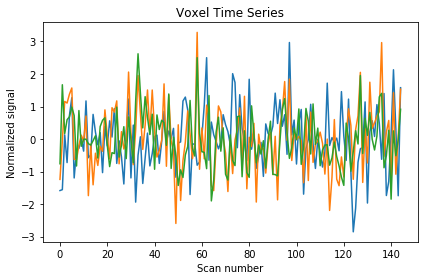

In [38]:
import matplotlib.pyplot as plt
plt.plot(fmri_masked[5:150, :3])

plt.title('Voxel Time Series')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()